In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [8]:
all_data = loadmat('data/sample_1.mat')
sample_data = np.array(all_data['data'])
spike_times = np.array(all_data['spike_times'])
print(sample_data.shape[1]/24000)

120.0


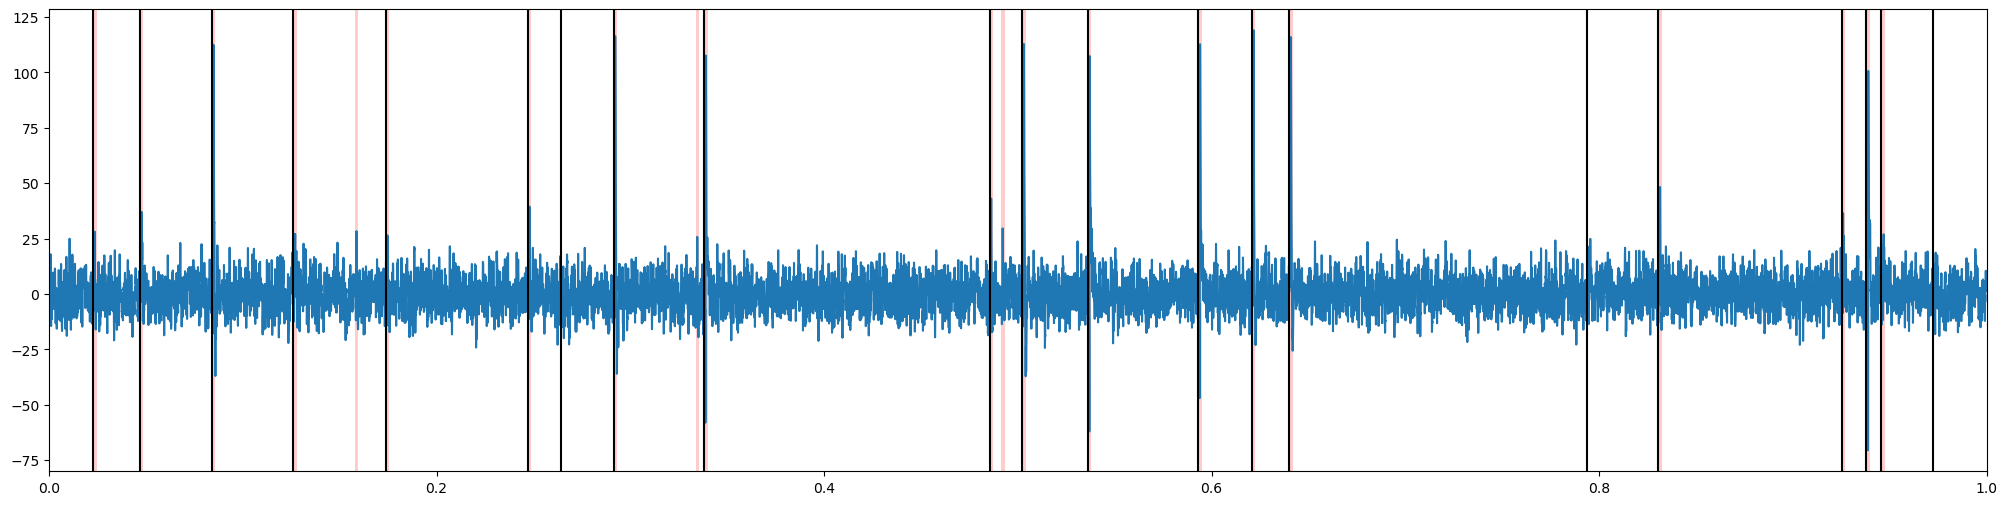

In [103]:
seconds = 1
sr = 24000

data = sample_data[0][:round(seconds*sr)]
plt.figure(figsize=(25,6))
plt.plot(np.linspace(0, seconds, round(seconds*sr)), data)
plt.xlim(0, seconds)

spike_times_reconstructed = np.where(data >= 25)[0]
spike_times_start_only = []
spike_times_start_only.append(spike_times_reconstructed[0])
spike_times_start_only.extend(spike_times_reconstructed[np.where(np.diff(spike_times_reconstructed) > 10)[0]+1])

for spike in spike_times_start_only:
    # plt.axvline(spike/sr - 0.0008, c='red', alpha=0.5)
    plt.axvspan(spike/sr - 0.0008, spike/sr + 0.001, facecolor='r', alpha=0.2)
    
for spike in spike_times[0][0][0][:round(seconds*sr)]/sr:
    plt.axvline(spike, c='k', alpha=1)
    
plt.show()